# Car price prediction
### 1. Data cleaning
### 2. Exploratory Data Analysis
### 3. Feature selection 
### 4. Data Modelling and evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

# 1. Data cleaning

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Drop car Id 

In [4]:
df=df.drop(['car_ID'],axis=1)

## Extracting car company from car name

In [5]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)

## Handling duplicate values in car name 

* nissan and Nissan are same
* toyota and toyouta are same 
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

In [6]:
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
vw              2
maxda           2
vokswagen       1
Nissan          1
toyouta         1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [7]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [8]:
df['symboling']=df['symboling'].astype('str')

# Categorical columns

In [9]:
categorical_cols=df.select_dtypes(include=['object']).columns

In [10]:
df[categorical_cols].head(4)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi


## Numerical columns 

In [11]:
numerical_cols=df.select_dtypes(exclude=['object']).columns

In [12]:
df[numerical_cols].head(4)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0


# 2. Exploratory Data Analysis

In [13]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Visualise different car names 

Text(0.5, 1.0, 'Car Name')

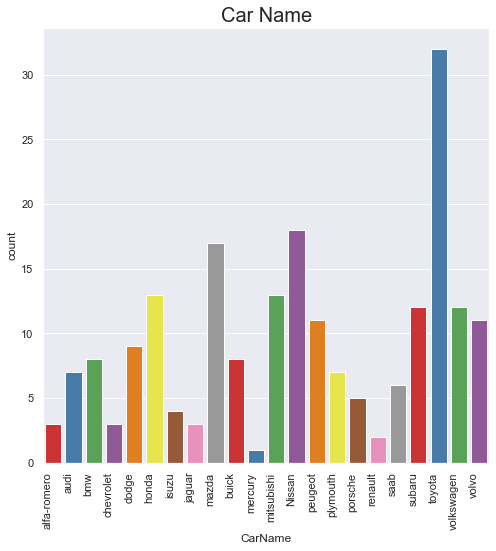

In [14]:

g = sns.countplot(x="CarName",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Car Name',size = 20)

According to the dataset-
* Toyota is the most preferred car 
* mercury is the least preferred car

# Fuel type Ratio

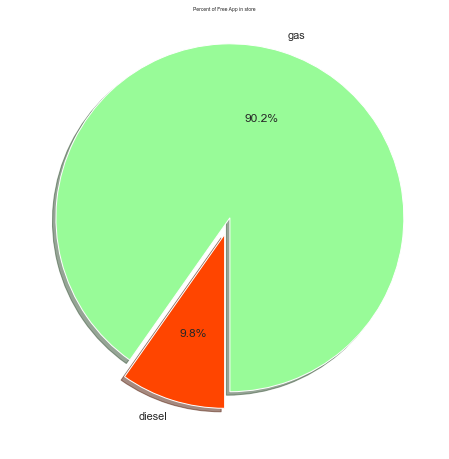

In [15]:
labels =df['fueltype'].value_counts(sort = True).index
sizes = df['fueltype'].value_counts(sort = True)
colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 5)
plt.show()

* Most of the car has gas fuel 

# Price distribution of cars

c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


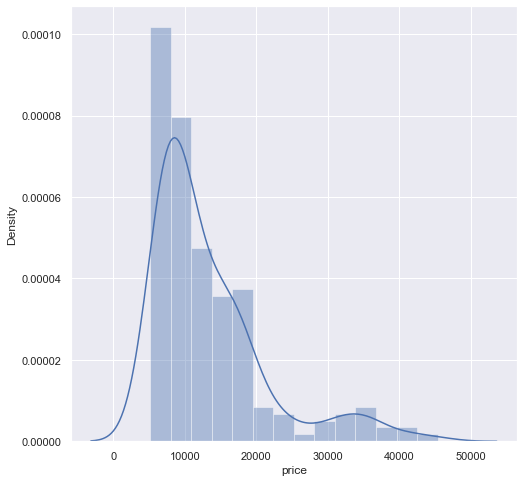

In [16]:
sns.distplot(df['price'],kde=True)

* Price distribution plot is right skewed 
* maximum  number of cars are in range of 20000

# Price distribution of diesel vs gas car

c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

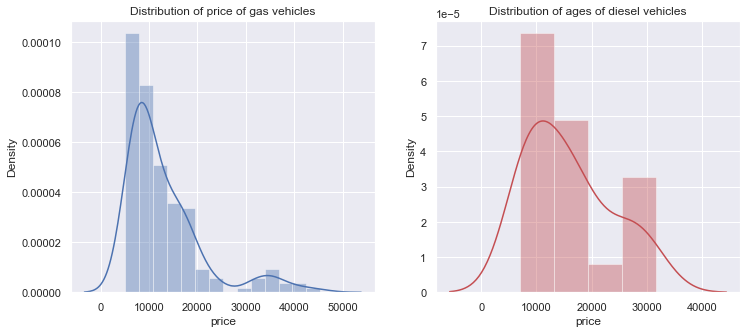

In [17]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

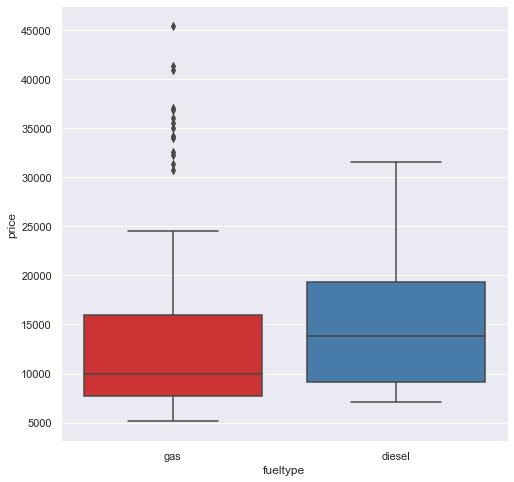

In [18]:
sns.boxplot(x = 'fueltype', y = 'price', data = df,palette="Set1")

* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

# Aspiration ratio

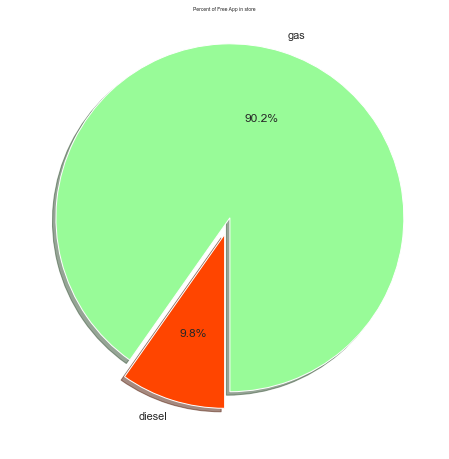

In [19]:
labels =df['fueltype'].value_counts(sort = True).index
sizes = df['fueltype'].value_counts(sort = True)
colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 5)
plt.show()

* Most of the cars have standard aspiration

# Price distribution of Std vs Turbo aspiration vehicles

c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

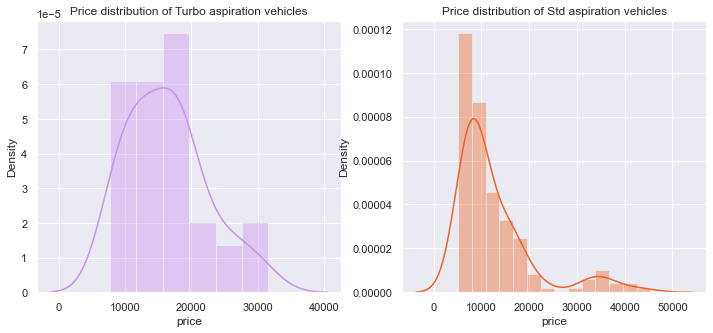

In [20]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')


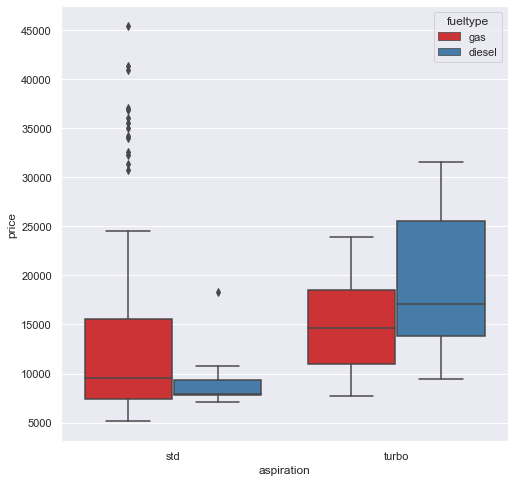

In [21]:
sns.boxplot(x = 'aspiration', y = 'price', hue='fueltype',data = df,palette='Set1')

* Price of turbo is higher in compared to std when fuel type is diesel , although there are some outliers in std price

# Symboling 

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

Text(0.5, 1.0, 'symboling')

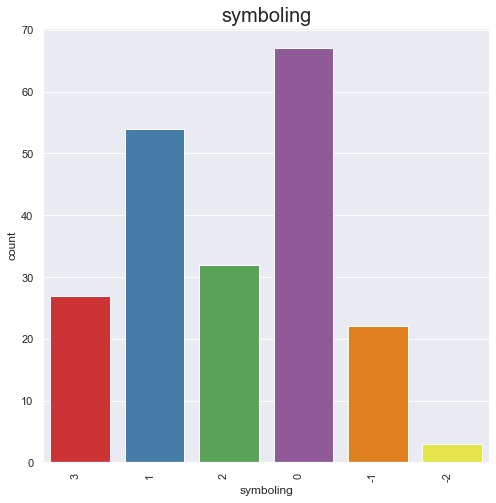

In [22]:
g = sns.countplot(x="symboling",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('symboling',size = 20)

 * Most of the car symboling has 0 value 

# Price distribution according to symboling 

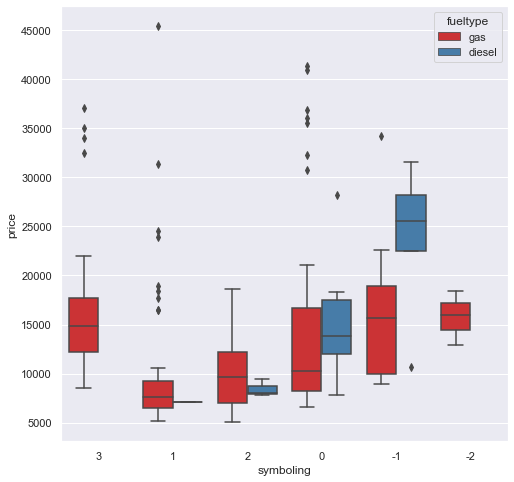

In [23]:
sns.boxplot(x = 'symboling', y = 'price',hue='fueltype', data = df,palette="Set1")

* Price of -1 symboling is higher in compare to others

# Door number

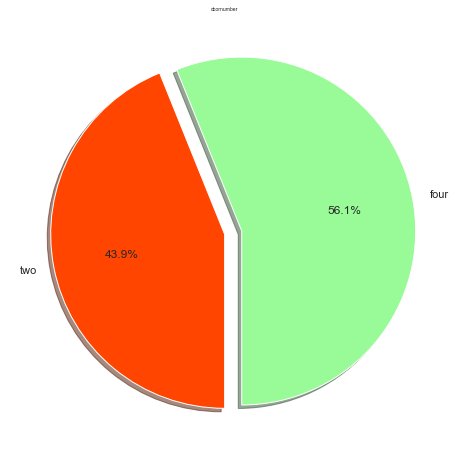

In [24]:
labels =df['doornumber'].value_counts(sort = True).index
sizes = df['doornumber'].value_counts(sort = True)
colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('doornumber',size = 5)
plt.show()

###### 56.1% cars has four dooors and 43.9% cars has 2 doors

# Price distribution according to door number 

c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rotana\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of cars having four doors')

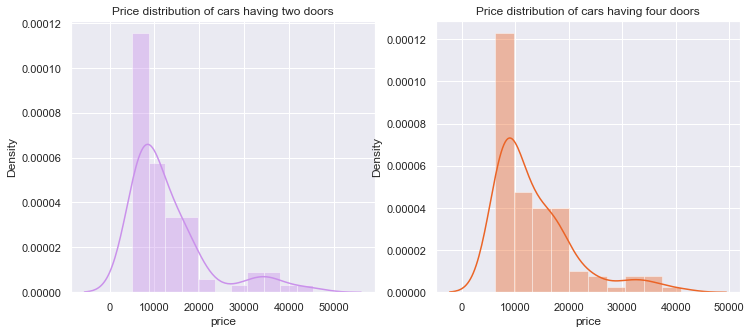

In [25]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')


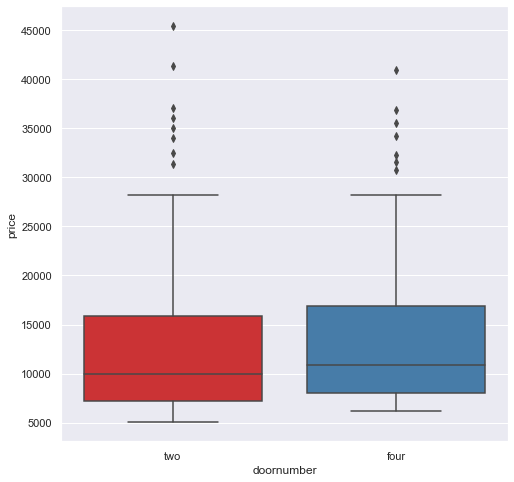

In [26]:
sns.boxplot(x = 'doornumber', y = 'price', data = df,palette='Set1')

* As you can see there is slight difference in distributions of cars having two doors vs cars having 4 doors

# Carbody

In [27]:
data=pd.DataFrame(df['carbody'].value_counts())

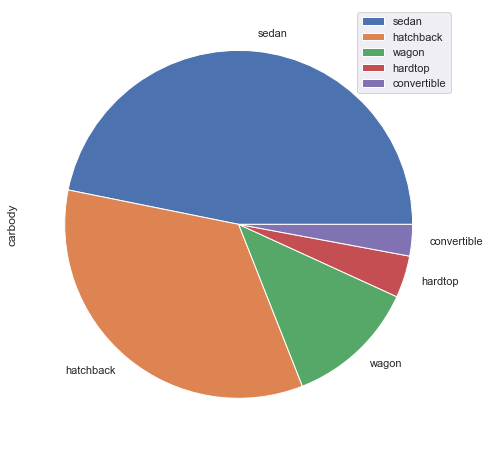

In [28]:
plot = data.plot.pie(y='carbody', figsize=(8, 8))

* majority of car body are sedan and hatchback

# Price distribution according to car body

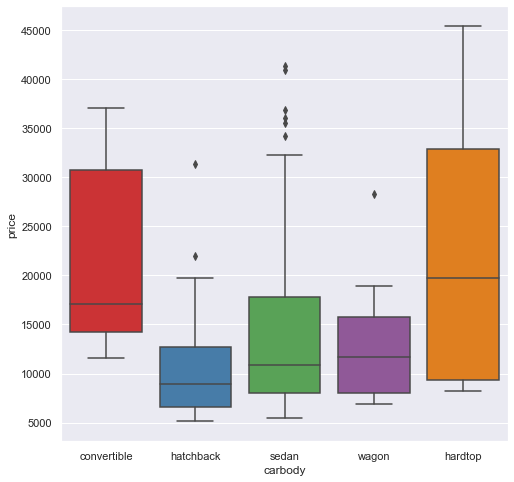

In [29]:
sns.boxplot(x = 'carbody', y = 'price', data = df,palette='Set1')

* price of hardtop is very high compare to others

# Drive wheel

In [30]:
data=pd.DataFrame(df['drivewheel'].value_counts())

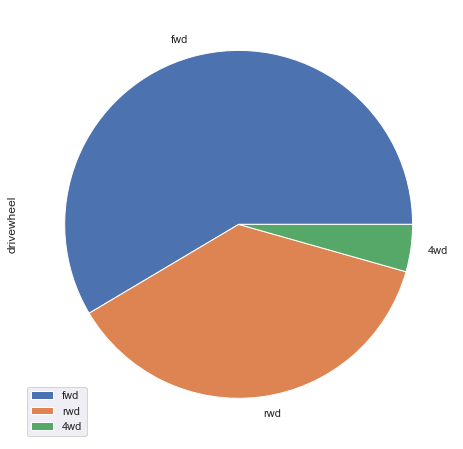

In [31]:
plot = data.plot.pie(y='drivewheel', figsize=(8, 8))


* Maximum cars has fwd drive wheel

# Price distribution according to drive wheel 

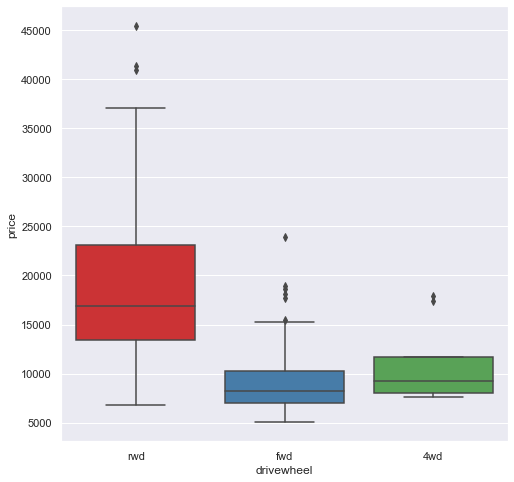

In [32]:
sns.boxplot(x = 'drivewheel', y = 'price', data = df,palette='Set1')

* Price range of rwd drivewheel cars is quite high compare to others

# Engine location

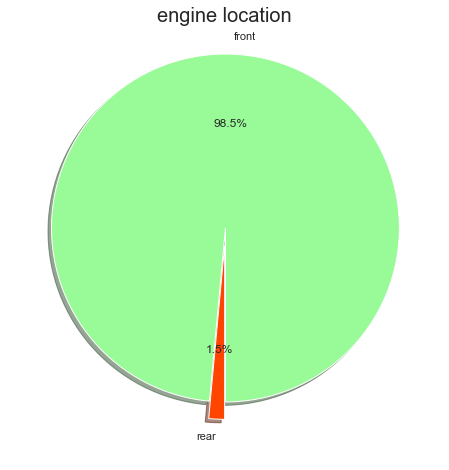

In [33]:
labels =df['enginelocation'].value_counts(sort = True).index
sizes = df['enginelocation'].value_counts(sort = True)
colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('engine location',size = 20)
plt.show()

* front is the most engine location

# Engine type

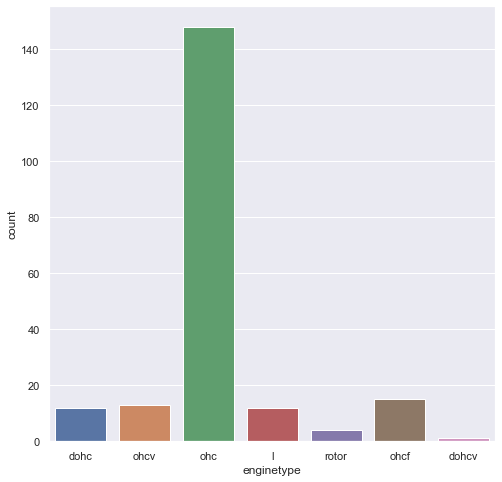

In [34]:
g = sns.countplot(x="enginetype", data=df)

* Maximum number of engine type are of 'ohc'

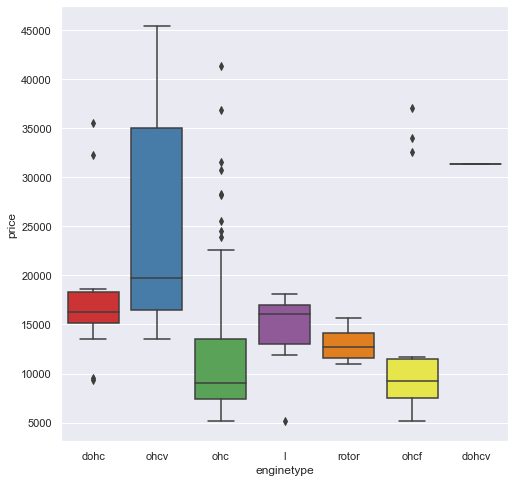

In [35]:
sns.boxplot(x = 'enginetype', y = 'price', data = df,palette='Set1')

* price range of ohcv engine cars are quite high in compare to others

# Cylinder number

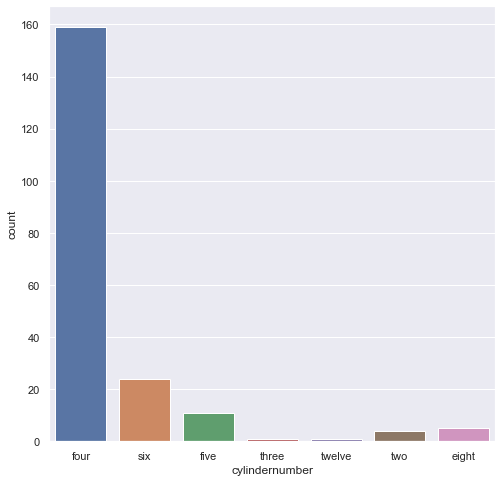

In [36]:
g=sns.countplot(x='cylindernumber',data=df)

* maximum cars are of four cylinder number

# Price distribution according to cylinder number

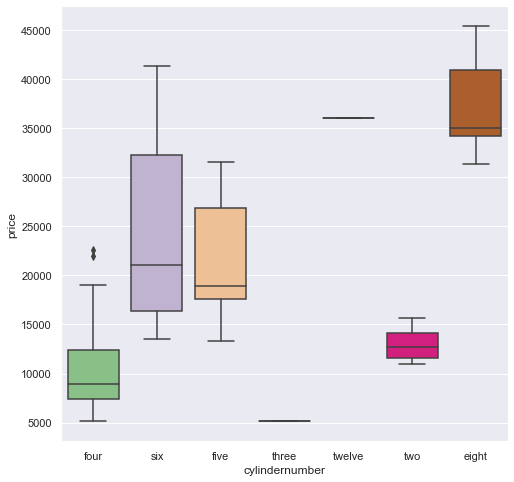

In [37]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = df,palette='Accent')

* there is only 1 car having cylinder number 3 and 12 .
* car having cylinder number eight has higher price range.

# Fuel system 

In [38]:
data=pd.DataFrame(df['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})

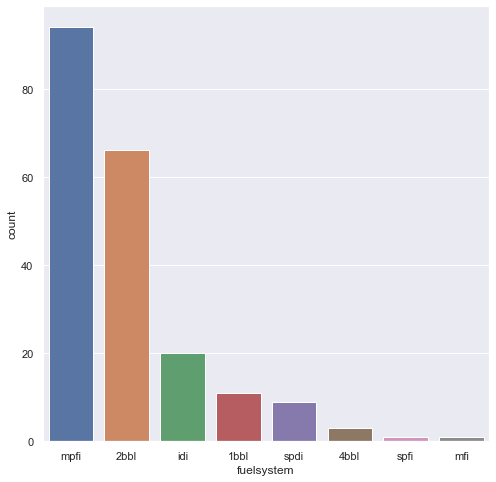

In [39]:
sns.barplot(x='fuelsystem',y='count',data=data)

* most number of cars having fuel system mpfi
* least number of cars having fuel system mfi and spfi

# Price distribution according to fuel system

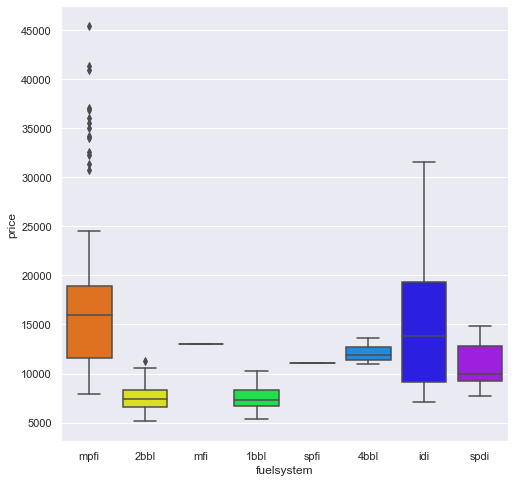

In [40]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = df,palette='gist_rainbow')

* price range are high of car having idi fuel system 

# Visualising Numerical features

# Wheel base Vs Price


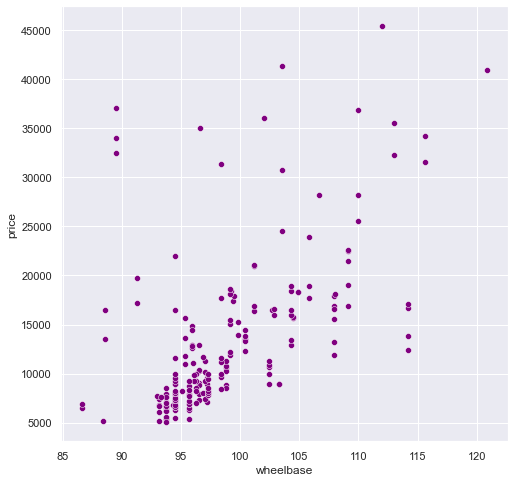

In [41]:
sns.scatterplot(x="wheelbase", y="price", data=df,color='purple')

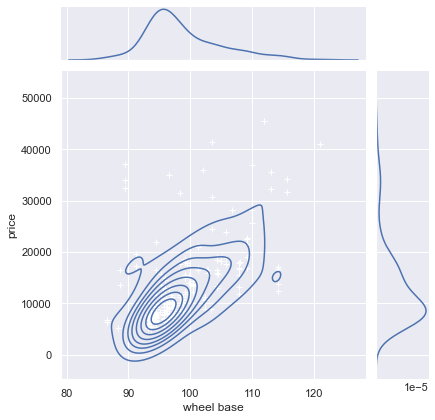

In [42]:
g = sns.jointplot(x="wheelbase", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

* Highly scattered points

# Carlength vs Car price

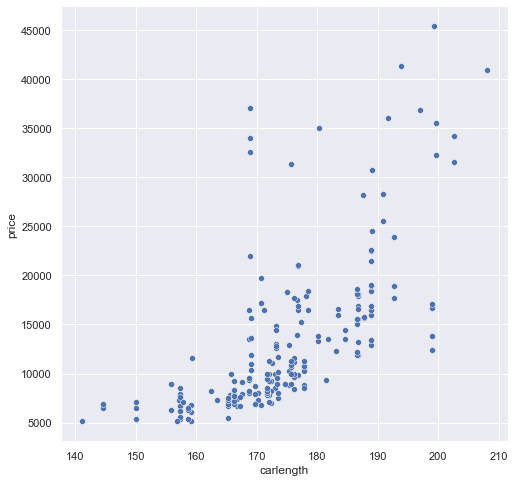

In [43]:
sns.scatterplot(x="carlength", y="price", data=df,color='b')

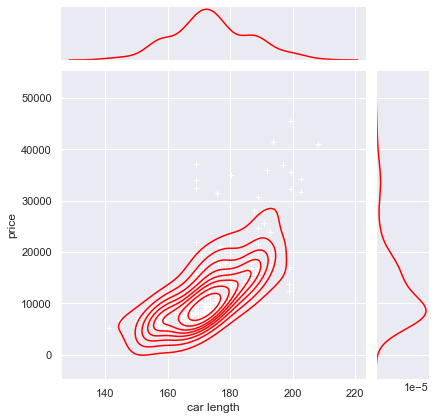

In [44]:
g = sns.jointplot(x="carlength", y="price", data=df, kind="kde", color="red")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

* car length also scattered but less scattered than wheelbase

# Car width Vs Price

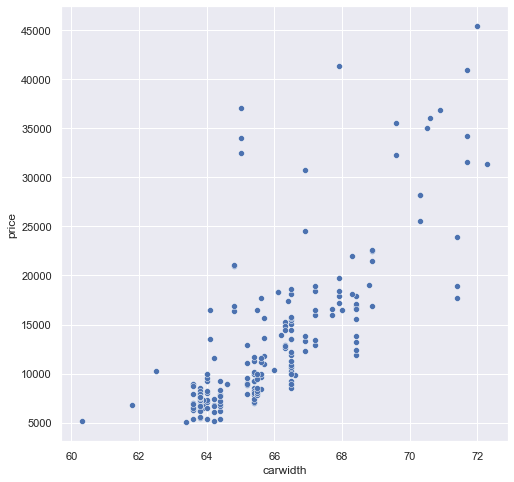

In [45]:
sns.scatterplot(x="carwidth", y="price", data=df,color='b')

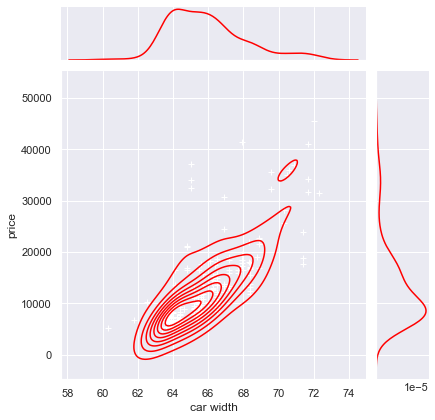

In [46]:
g = sns.jointplot(x="carwidth", y="price", data=df, kind="kde", color="red")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

# Car length vs Car width

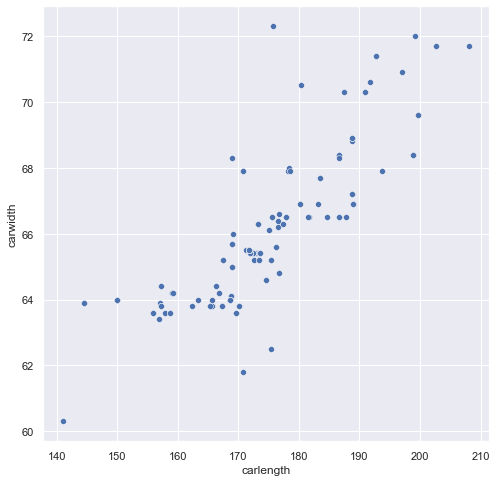

In [47]:
sns.scatterplot(x="carlength", y="carwidth", data=df,color='b')

# Curbweight vs Price

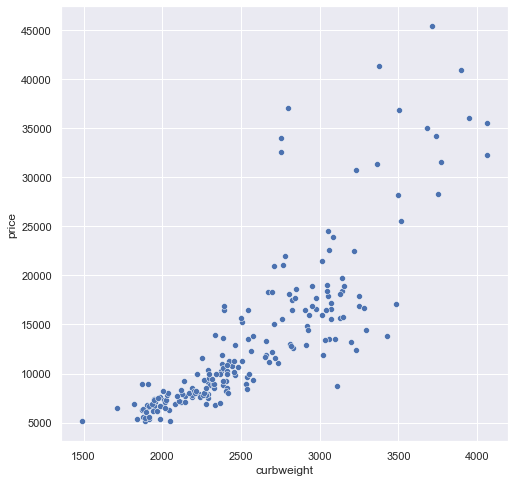

In [48]:
sns.scatterplot(x="curbweight", y="price", data=df,color='b')

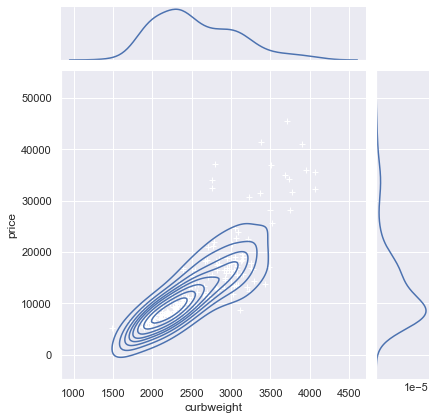

In [49]:
g = sns.jointplot(x="curbweight", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

* points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after curbweight of 2900 .

# Engine size Vs Price

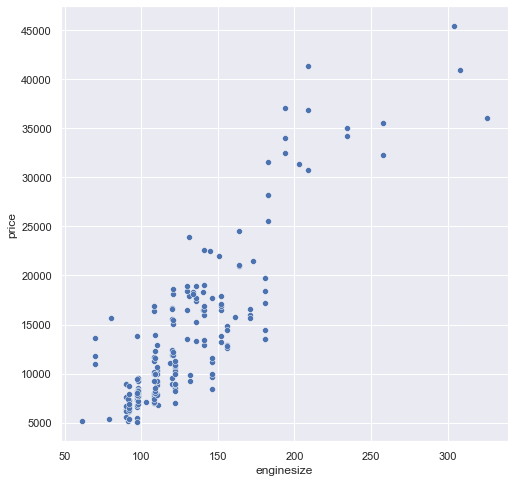

In [50]:
sns.scatterplot(x="enginesize", y="price", data=df,color='b')

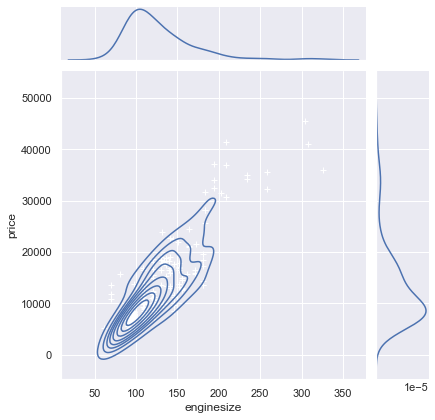

In [51]:
g = sns.jointplot(x="enginesize", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

* points are scattered after engine size of 140, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after engine size of 140 .

# Boreratio vs Price

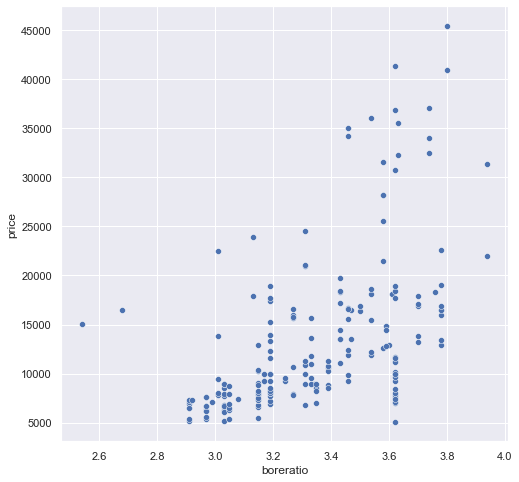

In [52]:
sns.scatterplot(x="boreratio", y="price", data=df,color='b')

# Stroke vs price

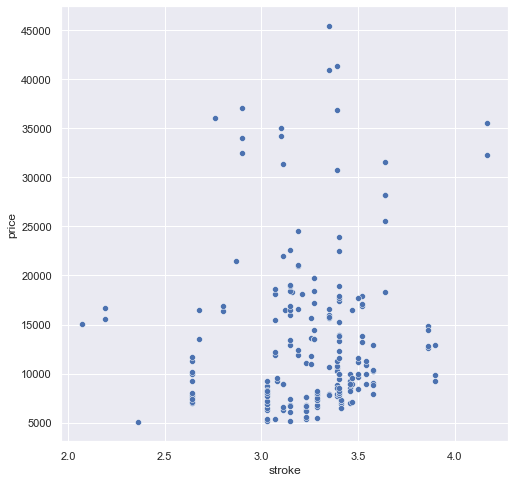

In [53]:
sns.scatterplot(x="stroke", y="price", data=df,color='b')

* very weak correlation between stroke vs price

# Compression ratio vs Price

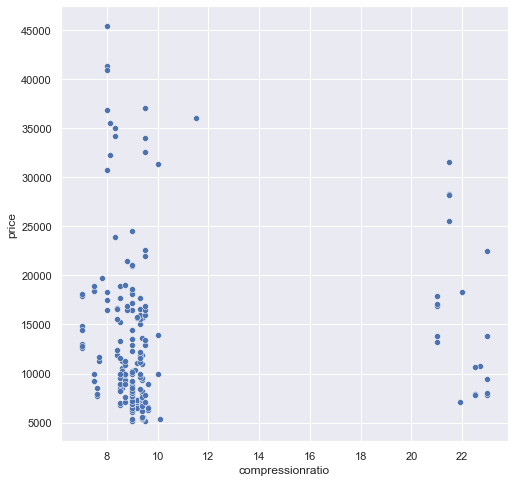

In [54]:
sns.scatterplot(x="compressionratio", y="price", data=df,color='b')

* no relation between compression ratio and price

# Horsepower vs Price

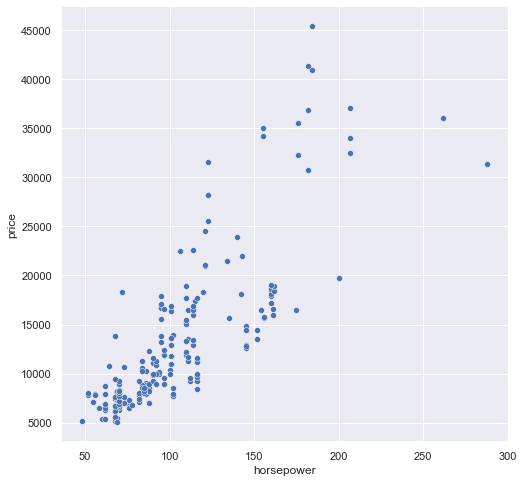

In [55]:
sns.scatterplot(x="horsepower", y="price", data=df,color='b')

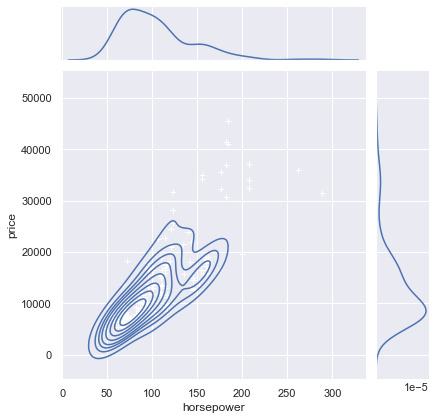

In [56]:
g = sns.jointplot(x="horsepower", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

# Peakrpm vs price

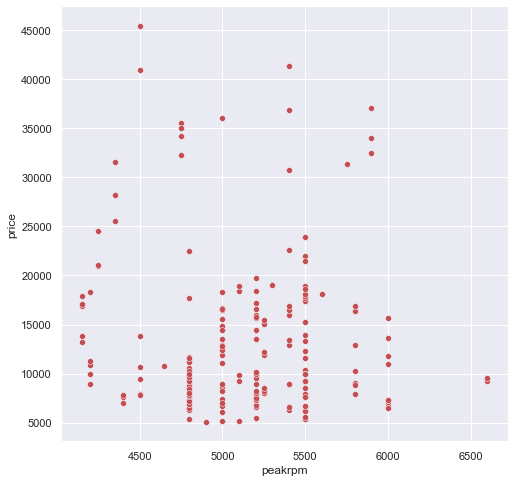

In [57]:
sns.scatterplot(x="peakrpm", y="price", data=df,color='r')

* no correlation between peakrpm and  price

# Citympg vs Price

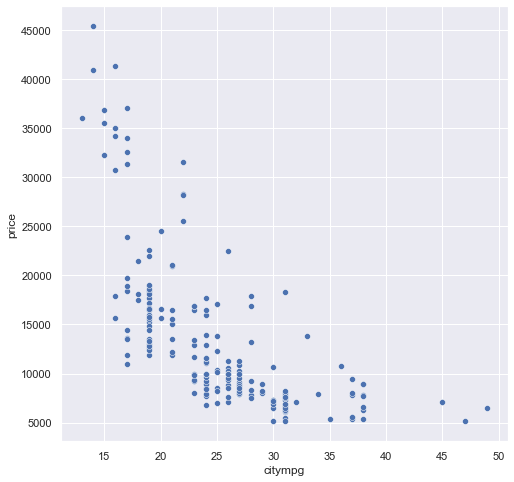

In [58]:
sns.scatterplot(x="citympg", y="price", data=df,color='b')

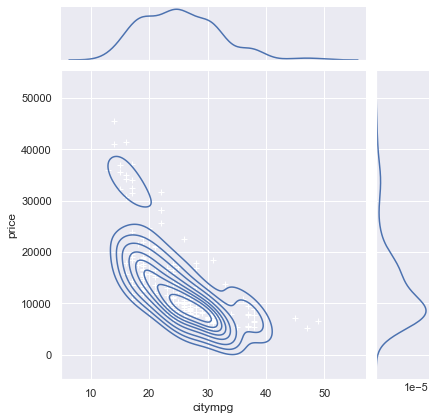

In [59]:
g = sns.jointplot(x="citympg", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

* negative correlation is seen between citympg and price

# Highwaympg vs Price

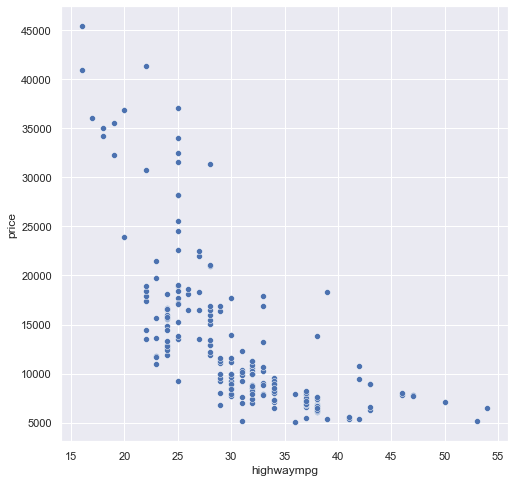

In [60]:
sns.scatterplot(x="highwaympg", y="price", data=df,color='b')

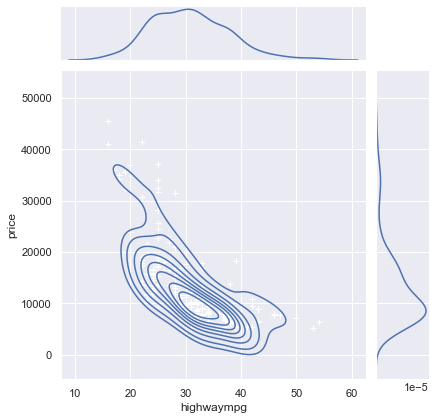

In [61]:
g = sns.jointplot(x="highwaympg", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

* negative correlation between highwaympg and price

# Pairplot of all numerical features

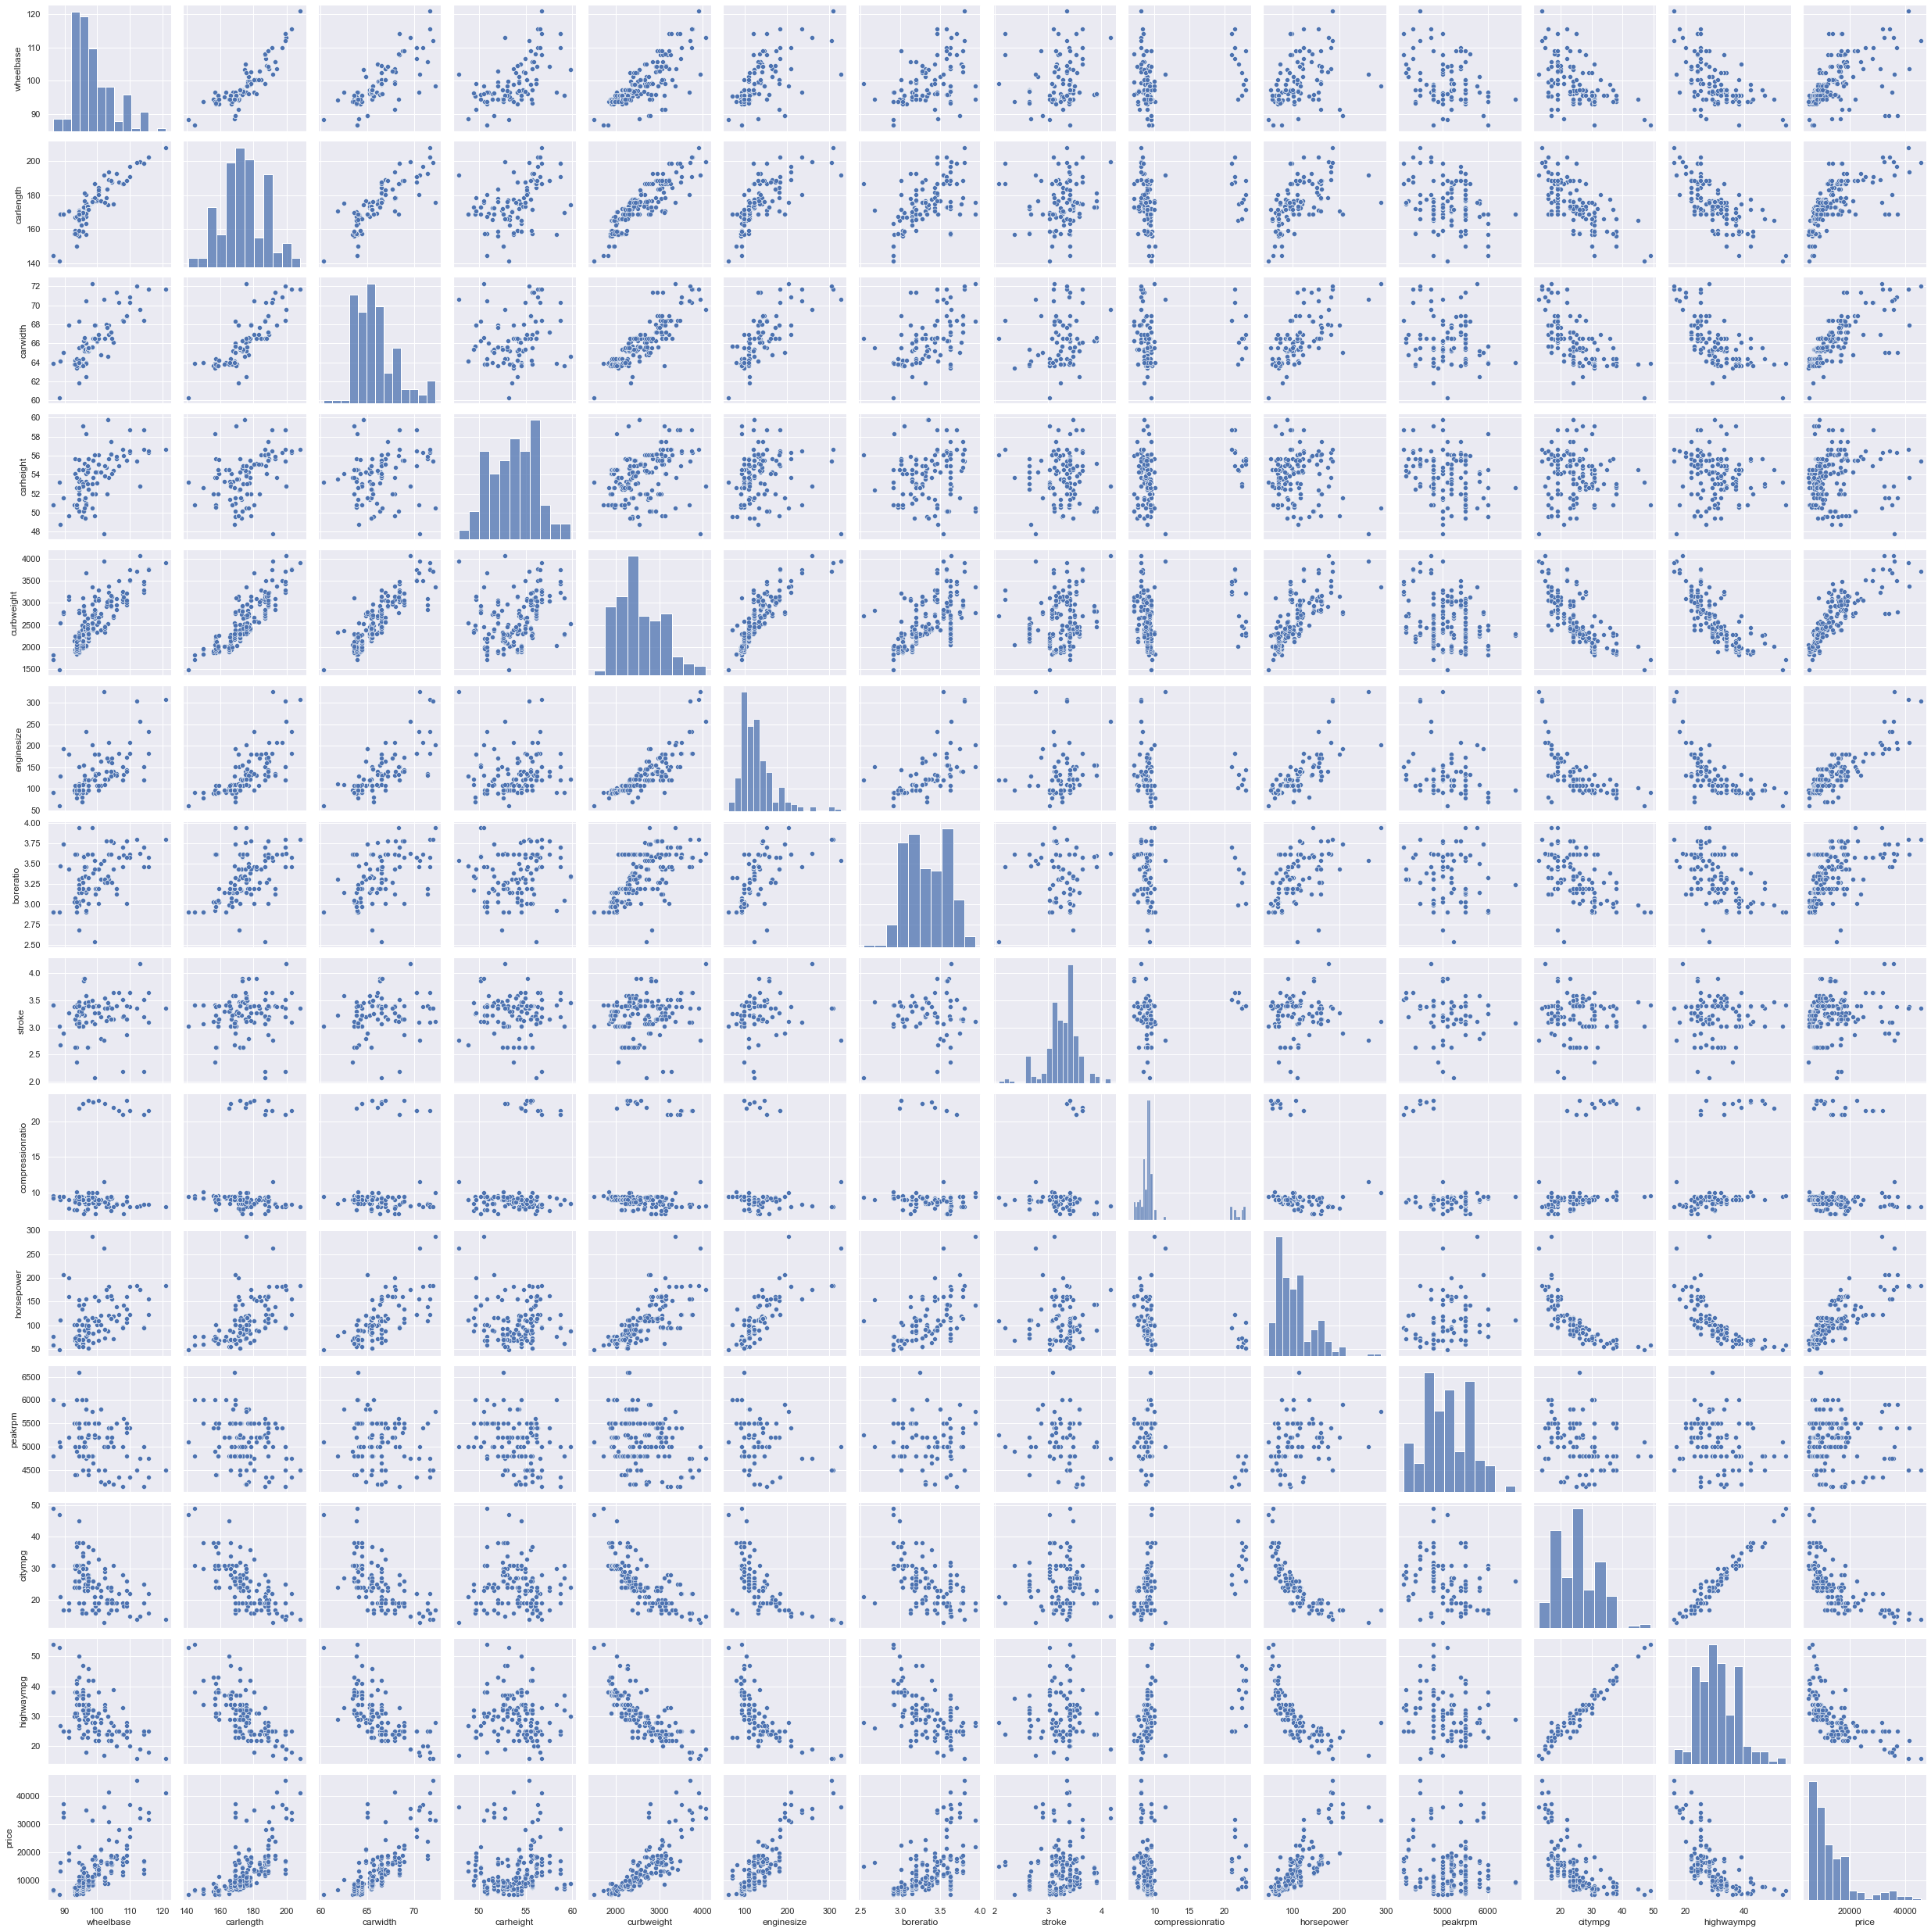

In [62]:
ax = sns.pairplot(df[numerical_cols])

# Correlation matrix

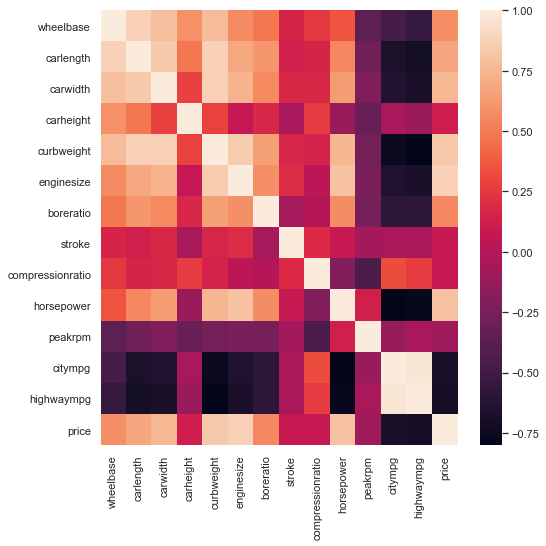

In [63]:
sns.heatmap(df[numerical_cols].corr())

* wheelbase has high positive correlation with carlength,carwidth and curbweight	
* carlength has high postive correlation with curbweight
* carlength has negative correlation with highwaympg 
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated 


# Scatter plot of wheelbase , carlength,carheight and carweight  with price

In [64]:
col=['wheelbase','carlength','carwidth','curbweight','price']

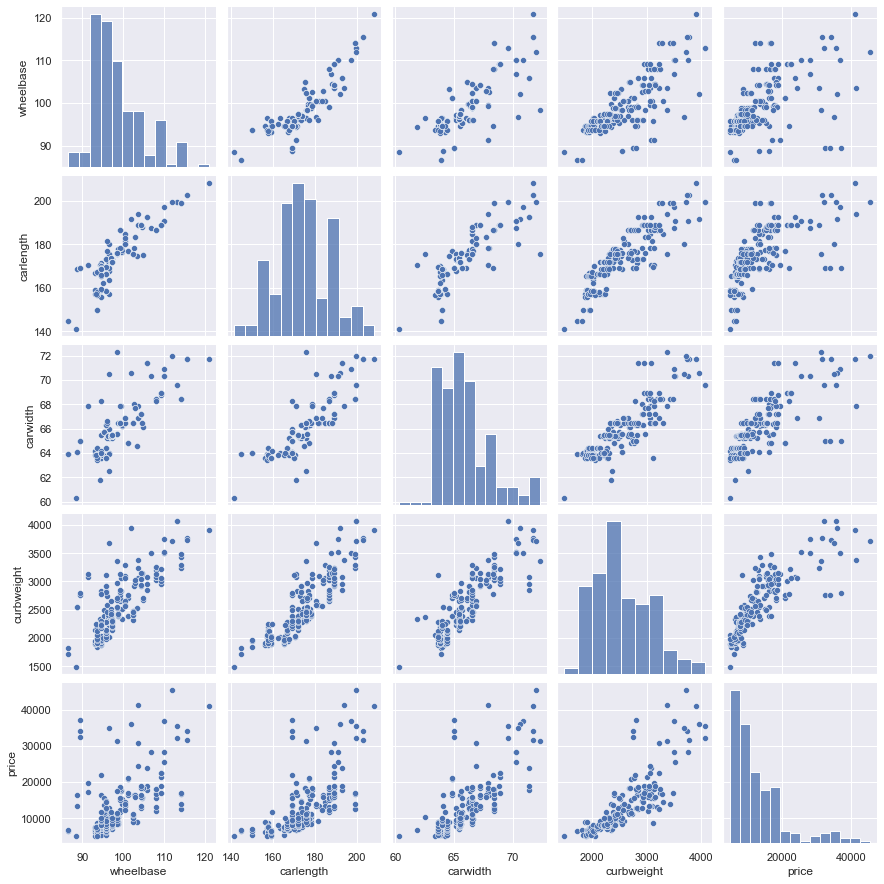

In [65]:
sns.pairplot(df[col])

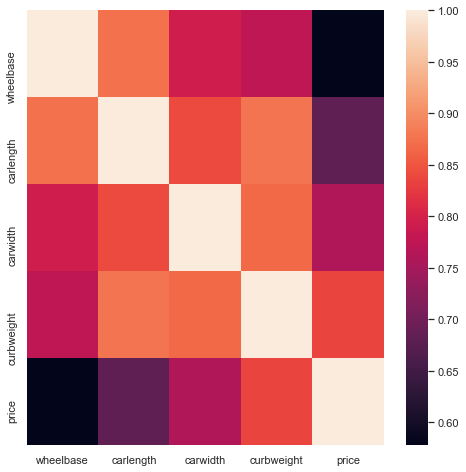

In [66]:
sns.heatmap(df[col].corr())

# Scatter plot of carlength,curbweight,highwaympg with price

In [67]:
col=['carlength','highwaympg','curbweight','price']

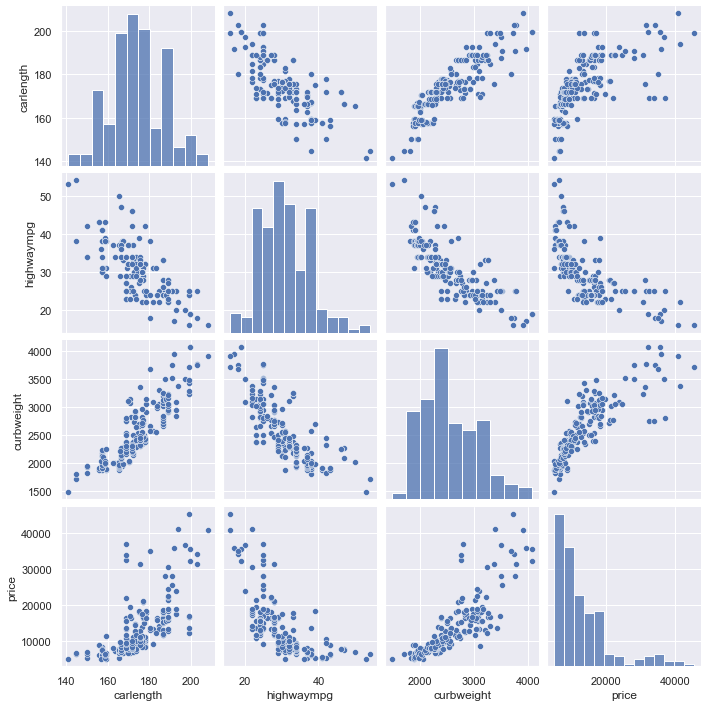

In [68]:
sns.pairplot(df[col])

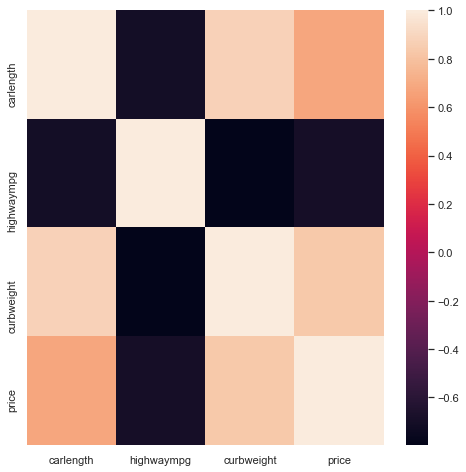

In [69]:
sns.heatmap(df[col].corr())

# Scatter plot of carwidth,curbweight ,engine size and price

In [70]:
col=['carwidth','curbweight','enginesize','price']

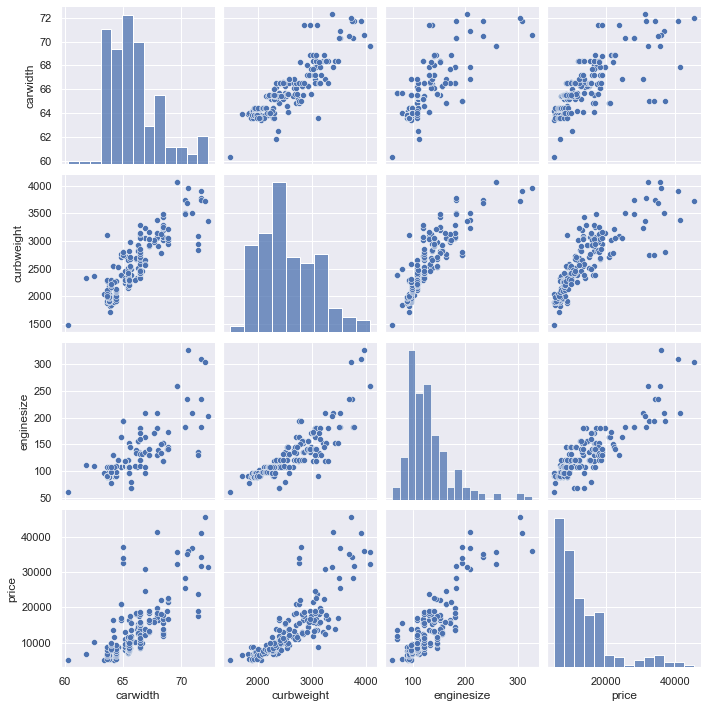

In [71]:
sns.pairplot(df[col])

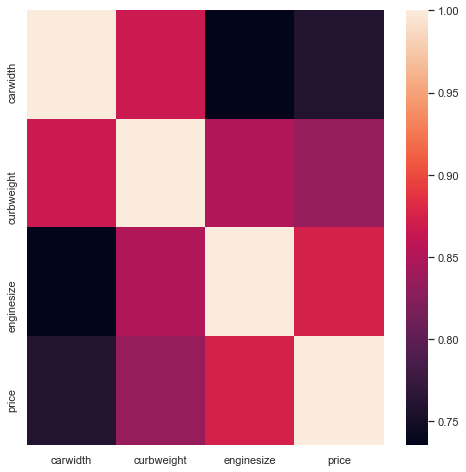

In [72]:
sns.heatmap(df[col].corr())

# Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

In [73]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

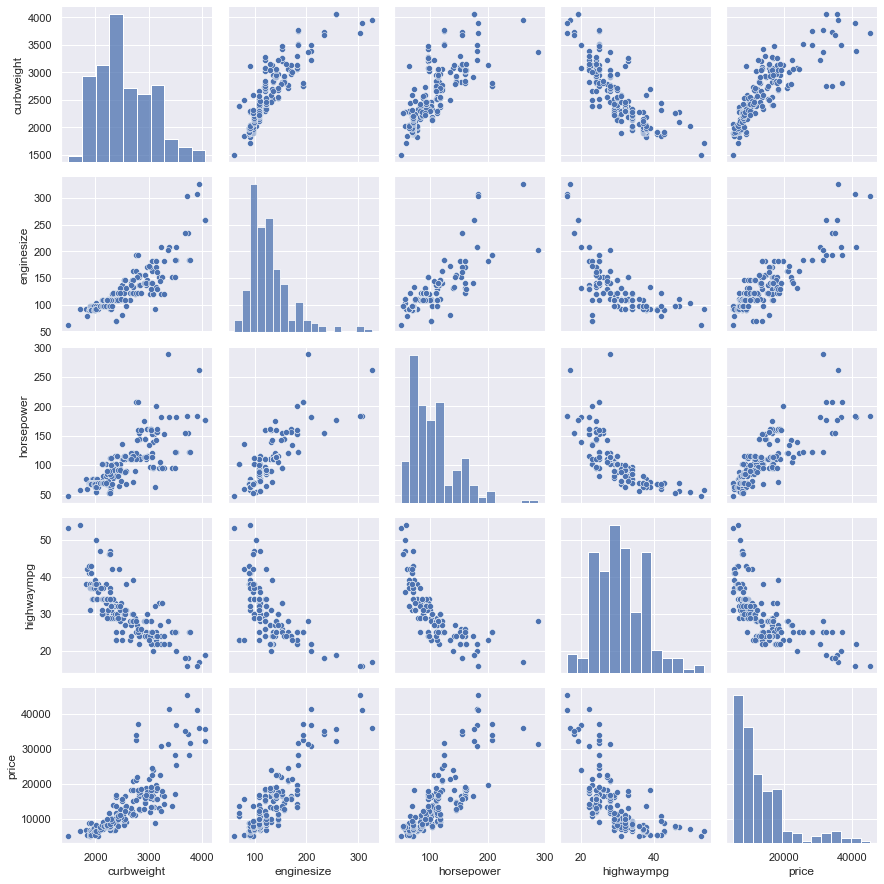

In [74]:
sns.pairplot(df[col])

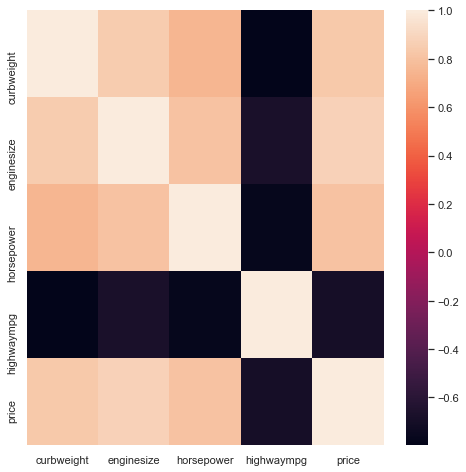

In [75]:
sns.heatmap(df[col].corr())

# Horsepower,citympg , highway mpg  and price

In [76]:
col=['horsepower','citympg','highwaympg','price']

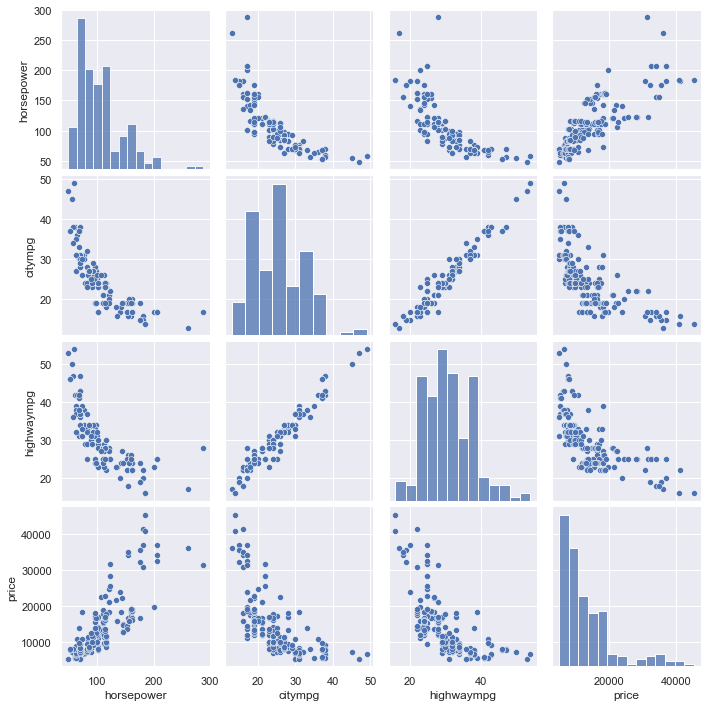

In [77]:
sns.pairplot(df[col])

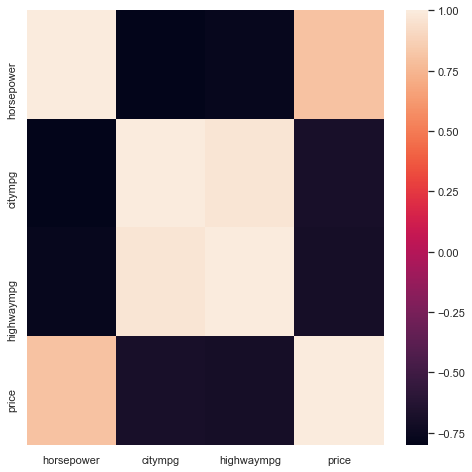

In [78]:
sns.heatmap(df[col].corr())


# Horsepower Vs Car Body categorized by carbody

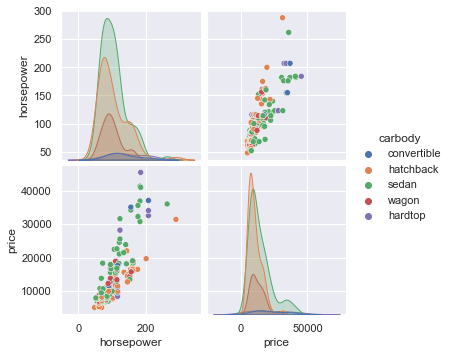

In [79]:
sns.pairplot(df[['horsepower','price','carbody']], hue="carbody");

# Fitting all features with price

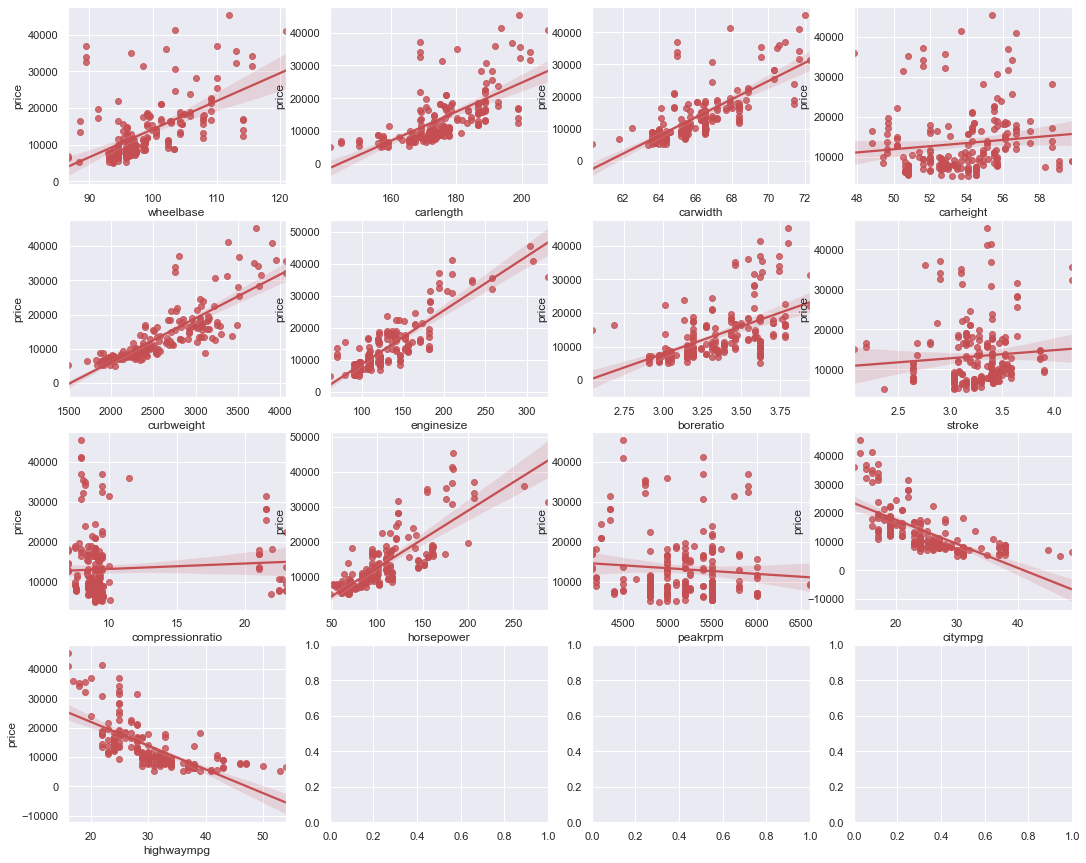

In [80]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=df,ax=axes[x][y],color='r')


# 3. Feature Selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [81]:
X=df[numerical_cols].drop('price',axis=1)
y=df['price']

# Recursive feature elimination (RFE) with random forest

In [82]:
X = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=df['price']

In [83]:

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [84]:
features=list(X.columns[rfe.support_])

In [85]:
features

['carbody',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

# 4.Data Modeling and Evaluation

In [86]:
x = X[features]
y = df.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

In [87]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

In [88]:
for model in models:
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))

0.7375029659751731
0.853941298983479
0.9130477619439239


In [89]:
model = RandomForestRegressor(1000)
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9130239167133499

In [90]:
model.predict(x_test)[50]

19594.983357999983

In [91]:
y_test.iloc[50]

23875.0

In [92]:
int(round(model.predict([['2','300','200','100','42','5000','5','200','3','4','15','100','8000','20','50']])[0]))

18080

In [93]:
import joblib

In [94]:
joblib.dump(model, 'car_model.pkl')

['car_model.pkl']